# Модуль 10: Параметры в вычислениях

**Тема: Динамичные формулы
Цель**: Понять, как создавать параметры в Tableau, чтобы пользователи могли вводить свои значения, и использовать их в формулах и визуализациях для гибких дашбордов.

## Теория
**Что такое параметры?**
Параметры в Tableau — это как ручки настройки, которые позволяют пользователю ввести значение (например, число, дату или текст), а ты используешь это значение в формулах или графиках. Это делает дашборд интерактивным: пользователь может выбрать, что хочет видеть, без необходимости менять данные или формулы. Например, можно дать пользователю выбрать регион или процент скидки, и Tableau пересчитает всё на лету.
**Как создавать параметры?**  
* Щёлкни правой кнопкой в панели Data → **Create Parameter**.  
* Задай имя (например, "Выбранный регион").  
* Выбери тип данных:  
  * **Number** (число, например, 10 или 0.05).  
  * **String** (текст, например, "West" или "Technology").  
  * **Date** (дата, например, 2025-06-23).  
  * **Boolean** (да/нет, например, True/False).
* Укажи допустимые значения:  
  * **List** (список, например, "West", "East").  
  * **Range** (диапазон, например, от 0 до 100).  
  * **All** (любой ввод).
* Задай значение по умолчанию (например, "West" или 10).  
* Показывай параметр в дашборде: щёлкни правой кнопкой на параметр → **Show Parameter**.

⠀**Как использовать параметры?**  
* В формулах: Вставляй параметр в вычисляемое поле (Create Calculated Field), чтобы он влиял на расчёты.  
* В фильтрах: Используй параметр, чтобы фильтровать данные (например, показать только выбранный регион).  
* В визуализациях: Добавляй параметр в заголовки, метки или оси для динамичного отображения.

⠀**Как параметры работают с фильтрами?**  
* **Фильтры в рабочем листе**: Параметры не конфликтуют с обычными фильтрами. Если у тебя фильтр [Year] = 2025 в рабочем листе, параметр (например, для региона) будет работать только с данными за 2025 год.  
* **Фильтры на уровне Data Source**: Параметры учитывают фильтры, заданные в Data Source. Если в Data Source фильтр [Order Date] = 2025, параметр будет работать только с этими данными.  
* **Фильтры через параметры**: Параметр сам может быть фильтром. Например, формула IF [Region] = [Выбранный регион] THEN [Sales] ELSE 0 END покажет продажи только для региона, выбранного в параметре.  
* **Совет**: Проверяй фильтры в Data Source, чтобы знать, какие данные доступны для параметра.

⠀**Сравнение параметров с другими инструментами**  
| **Что сравниваем** | **Параметры** | **Фильтры** |
|:-:|:-:|:-:|
| **Кто выбирает?** | Пользователь вводит значение (например, регион или число) через выпадающий список или поле. | Пользователь выбирает из данных (например, регионы, которые уже есть в базе). |
| **Гибкость** | Можно задать любые значения, даже не из данных (например, скидку 15%). | Ограничены данными в базе (нельзя выбрать регион, которого нет). |
| **Как влияет?** | Меняет формулы и графики (например, пересчитывает скидку или фильтрует регион). | Просто убирает строки из данных (например, показывает только West). |
| **Зачем нужен?** | Для динамичных расчётов и интерактивности (например, выбор топ-N или порога). | Для быстрого ограничения данных (например, только 2025 год). |
**Почему это важно?**
Параметры делают твои дашборды живыми и удобными. Пользователь может сам выбрать, что смотреть — регион, категорию, порог продаж или дату — и всё пересчитается мгновенно. Это как дать руль пользователю, чтобы он сам управлял анализом, без твоего вмешательства. Параметры работают с формулами, фильтрами и графиками, делая Tableau мощным инструментом для отчётов.

## Примеры с таблицами
**Исходная таблица базы данных** (Superstore):  
| Order ID | Category | Region | Sub-Category | Order Date | Sales | Profit |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Technology | West | Phones | 2025-01-01 | 1000 | 200 |
| 2 | Technology | East | Accessories | 2025-02-01 | 2000 | 400 |
| 3 | Furniture | West | Chairs | 2025-01-15 | 1500 | 300 |
| 4 | Furniture | East | Tables | 2025-03-01 | 500 | -50 |
* **Параметр для выбора региона**  
  * **Условие**: Хотим, чтобы пользователь выбирал регион (West или East), и видеть только продажи этого региона.  
  * **Что делаем**:  
    * Создаём параметр "Выбранный регион" (тип: String, список: "West", "East", по умолчанию: "West").  
    * Показываем параметр в дашборде (Show Parameter).  
    * Создаём формулу:   IF [Region] = [Выбранный регион] THEN [Sales] ELSE 0 END // Продажи выбранного региона
  * **Как работает**: Пользователь выбирает регион в выпадающем списке, и формула показывает продажи только для этого региона, обнуляя остальные.  
  * **Пример**: Пользователь выбрал "West".  
**Итоговая таблица** (визуализация с [Region]):  
| Region | SUM([Sales]) | IF [Region] = [Выбранный регион] THEN [Sales] ELSE 0 END |
|:-:|:-:|:-:|
| West | 2500 | 2500 |
| East | 2500 | 0 |

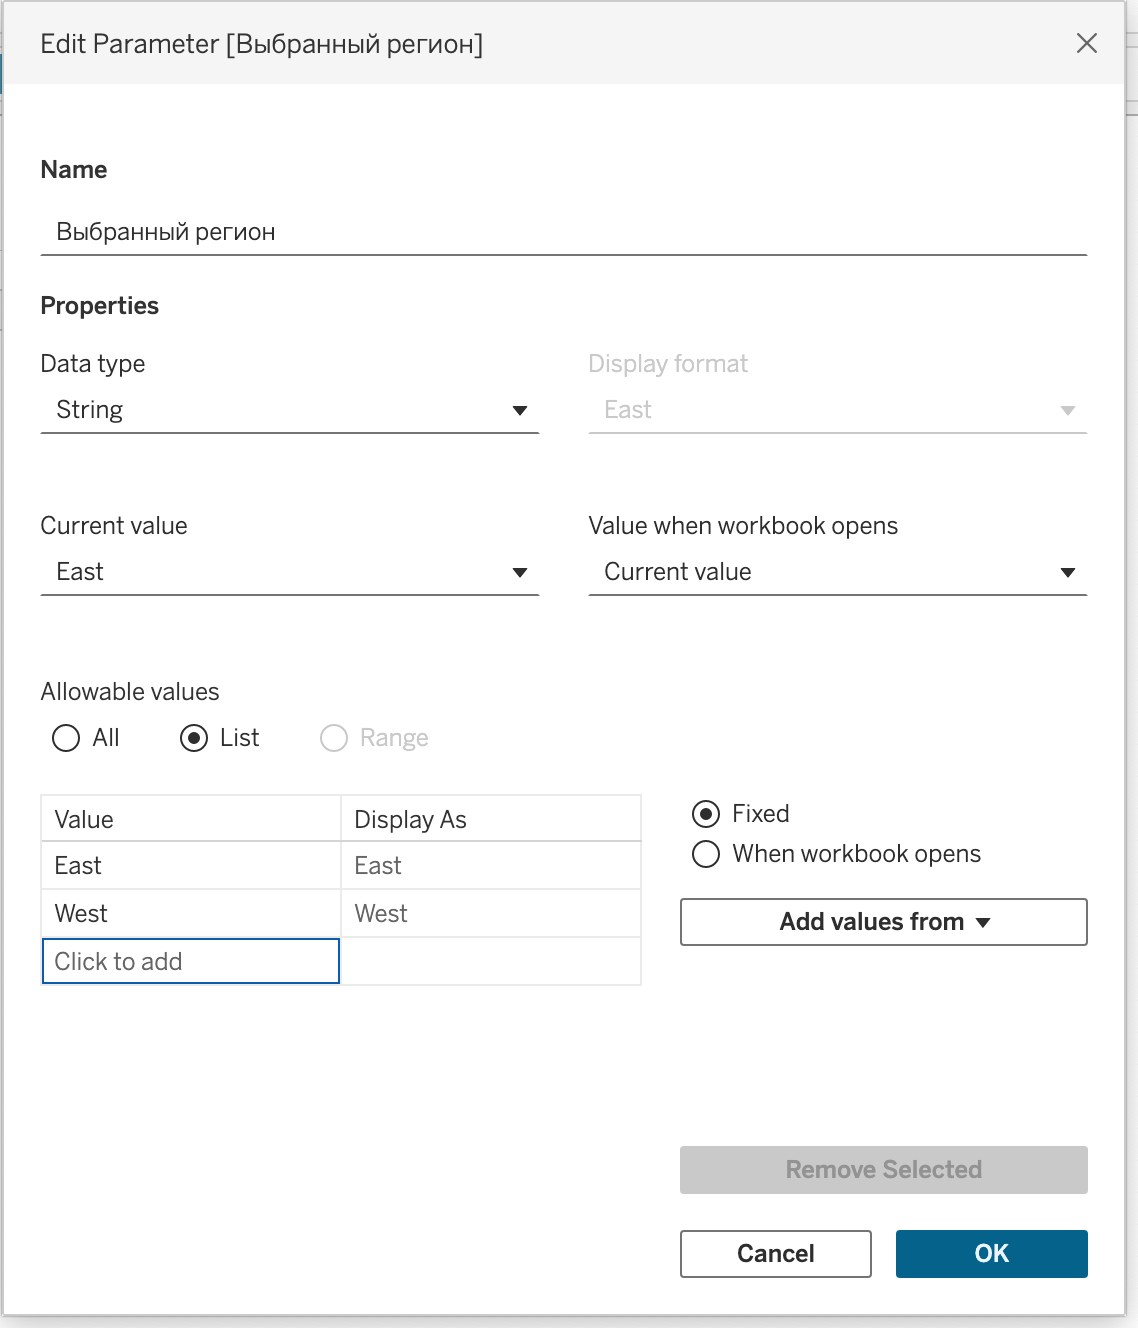

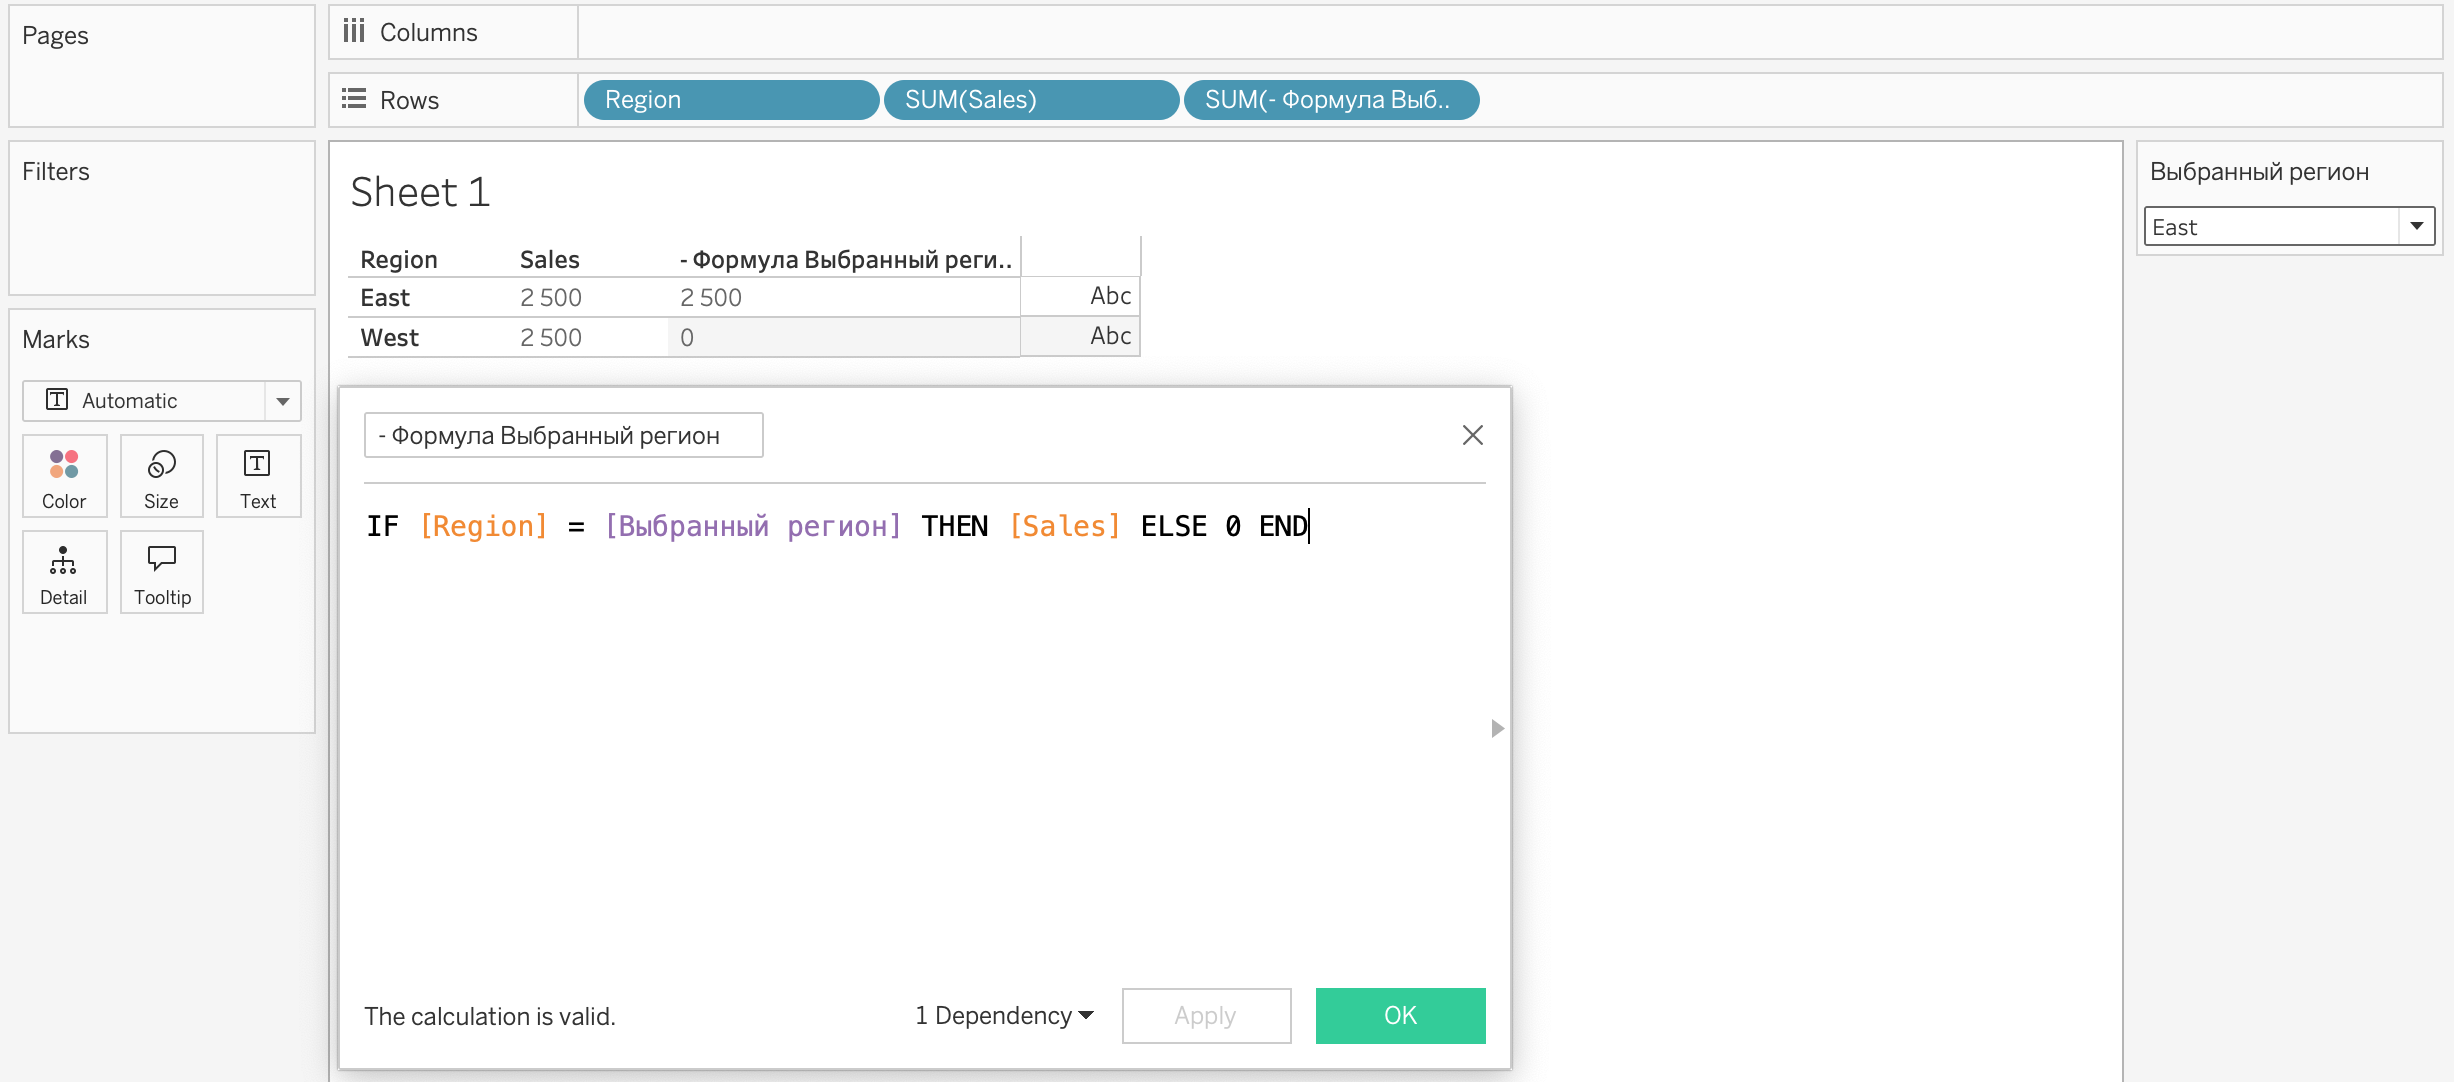

**Что получаем**: Продажи только для West (2500), остальные обнулены. Если выбрать "East", покажет 2500 для East.  
* **Примечание**: Если в Data Source фильтр [Order Date] = 2025, параметр работает только с этими данными.
* **Параметр для порога продаж**  
  * **Условие**: Хотим, чтобы пользователь вводил минимальную сумму продаж, и видеть категории, где продажи выше этого порога.  
  * **Что делаем**:  
    * Создаём параметр "Порог продаж" (тип: Number/Float, диапазон: 0–5000, шаг: 100, по умолчанию: 2000).  
    * Показываем параметр.  
    * Создаём формулу:   IF SUM([Sales]) >= [Порог продаж] THEN SUM([Sales]) ELSE 0 END // Продажи выше порога
  * **Как работает**: Пользователь вводит число, и формула показывает продажи только для категорий, где сумма продаж не меньше этого числа.  
  * **Пример**: Пользователь выбрал 2000.  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | IF SUM([Sales]) >= [Порог продаж] THEN SUM([Sales]) ELSE 0 END |
|:-:|:-:|:-:|
| Technology | 3000 | 3000 |
| Furniture | 2000 | 2000 |
**Что получаем**: Обе категории проходят порог (3000 и 2000 ≥ 2000). Если выбрать 2500, Furniture обнулится.

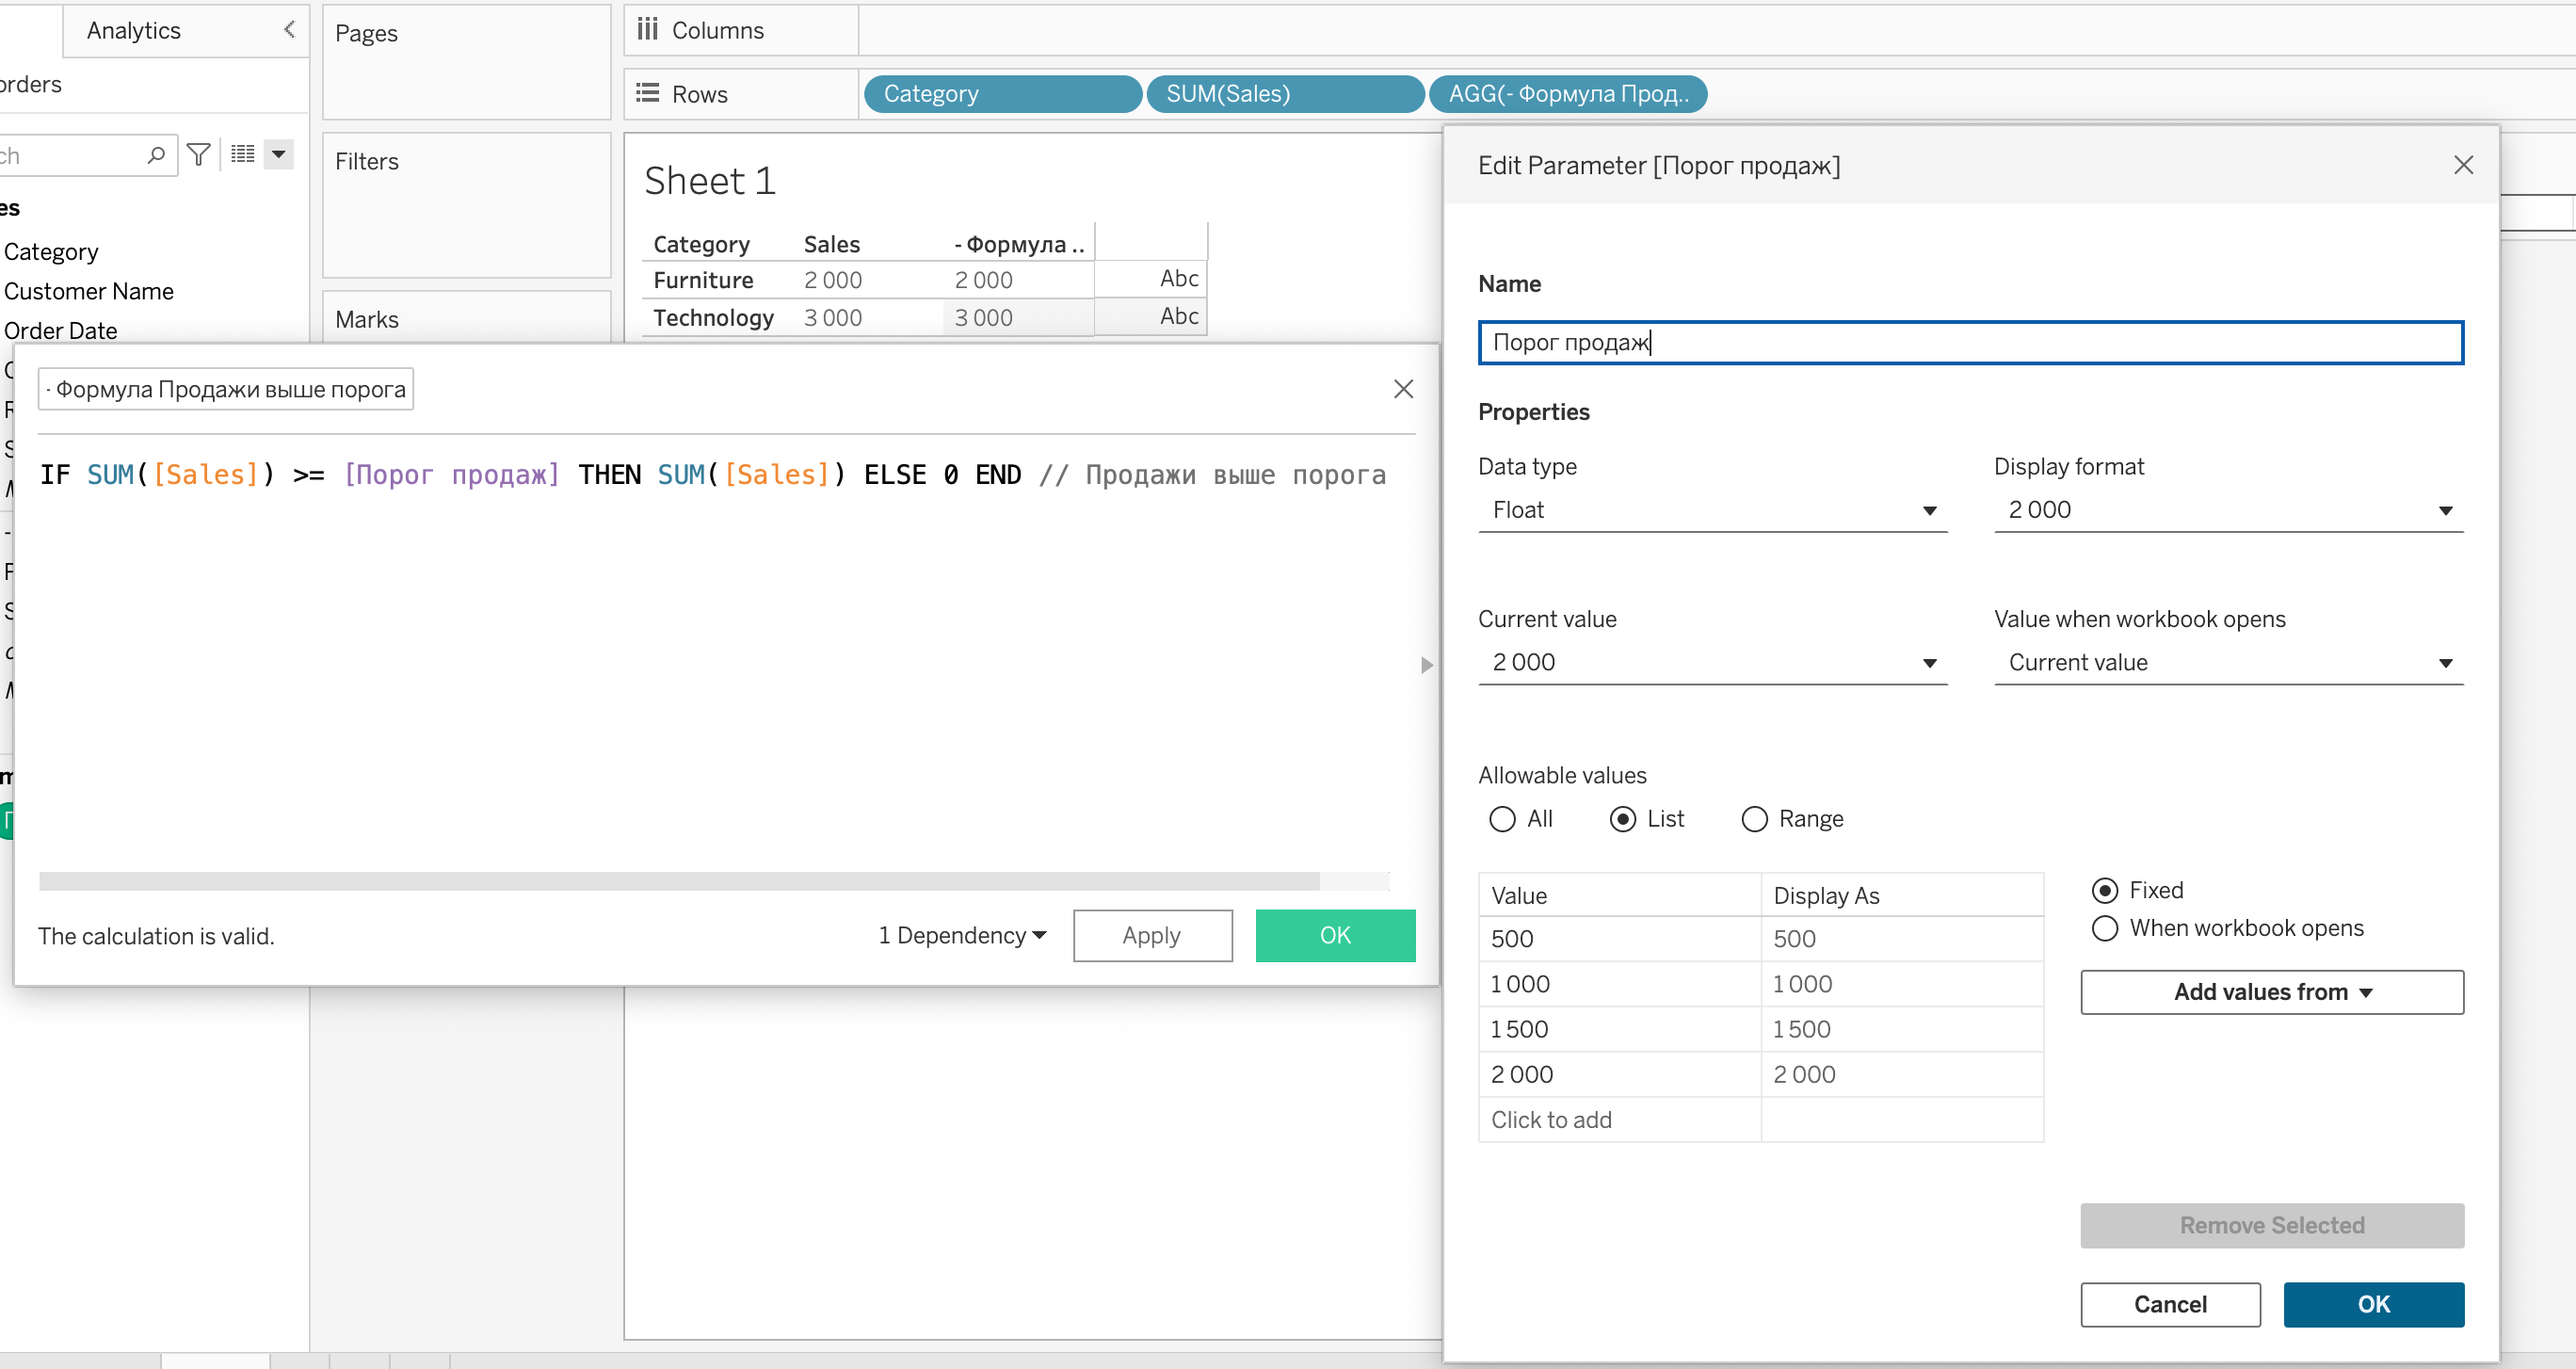

* **Параметр для топ-N категорий**  
  * **Условие**: Хотим, чтобы пользователь выбирал, сколько топ-категорий по продажам видеть (например, топ-2).  
  * **Что делаем**:  
    * Создаём параметр "Топ N" (тип: Number, список: 1, 2, 3, по умолчанию: 2).  
    * Показываем параметр.  
    * Создаём формулу:   IF RANK(SUM([Sales])) <= [Топ N] THEN SUM([Sales]) ELSE 0 END // Топ-N продаж
  * **Как работает**: Пользователь выбирает число N, и формула показывает продажи только для N категорий с самыми большими продажами.  
  * **Пример**: Пользователь выбрал 2.  
**Итоговая таблица** (визуализация с [Category], область для RANK: Table (Down)):  
| Category | SUM([Sales]) | IF RANK(SUM([Sales])) <= [Топ N] THEN SUM([Sales]) ELSE 0 END |
|:-:|:-:|:-:|
| Technology | 3000 | 3000 |
| Furniture | 2000 | 2000 |

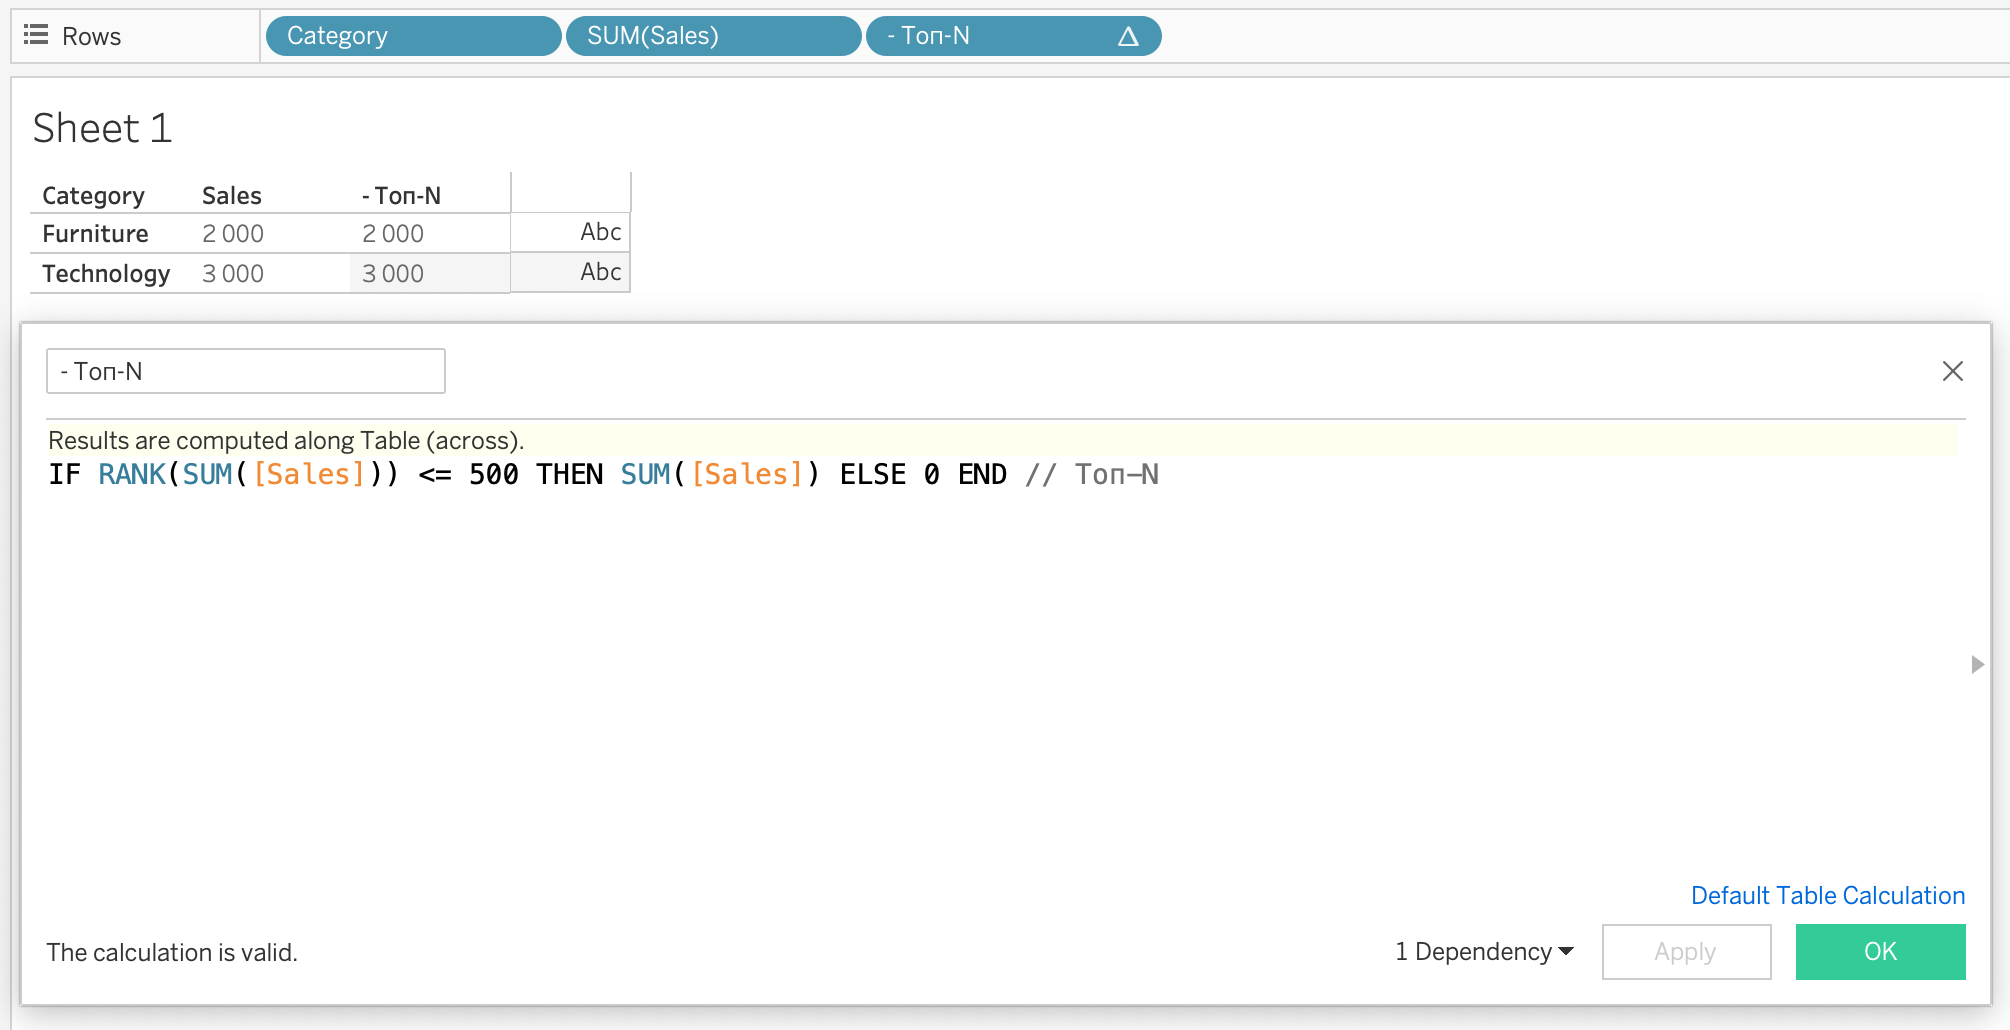

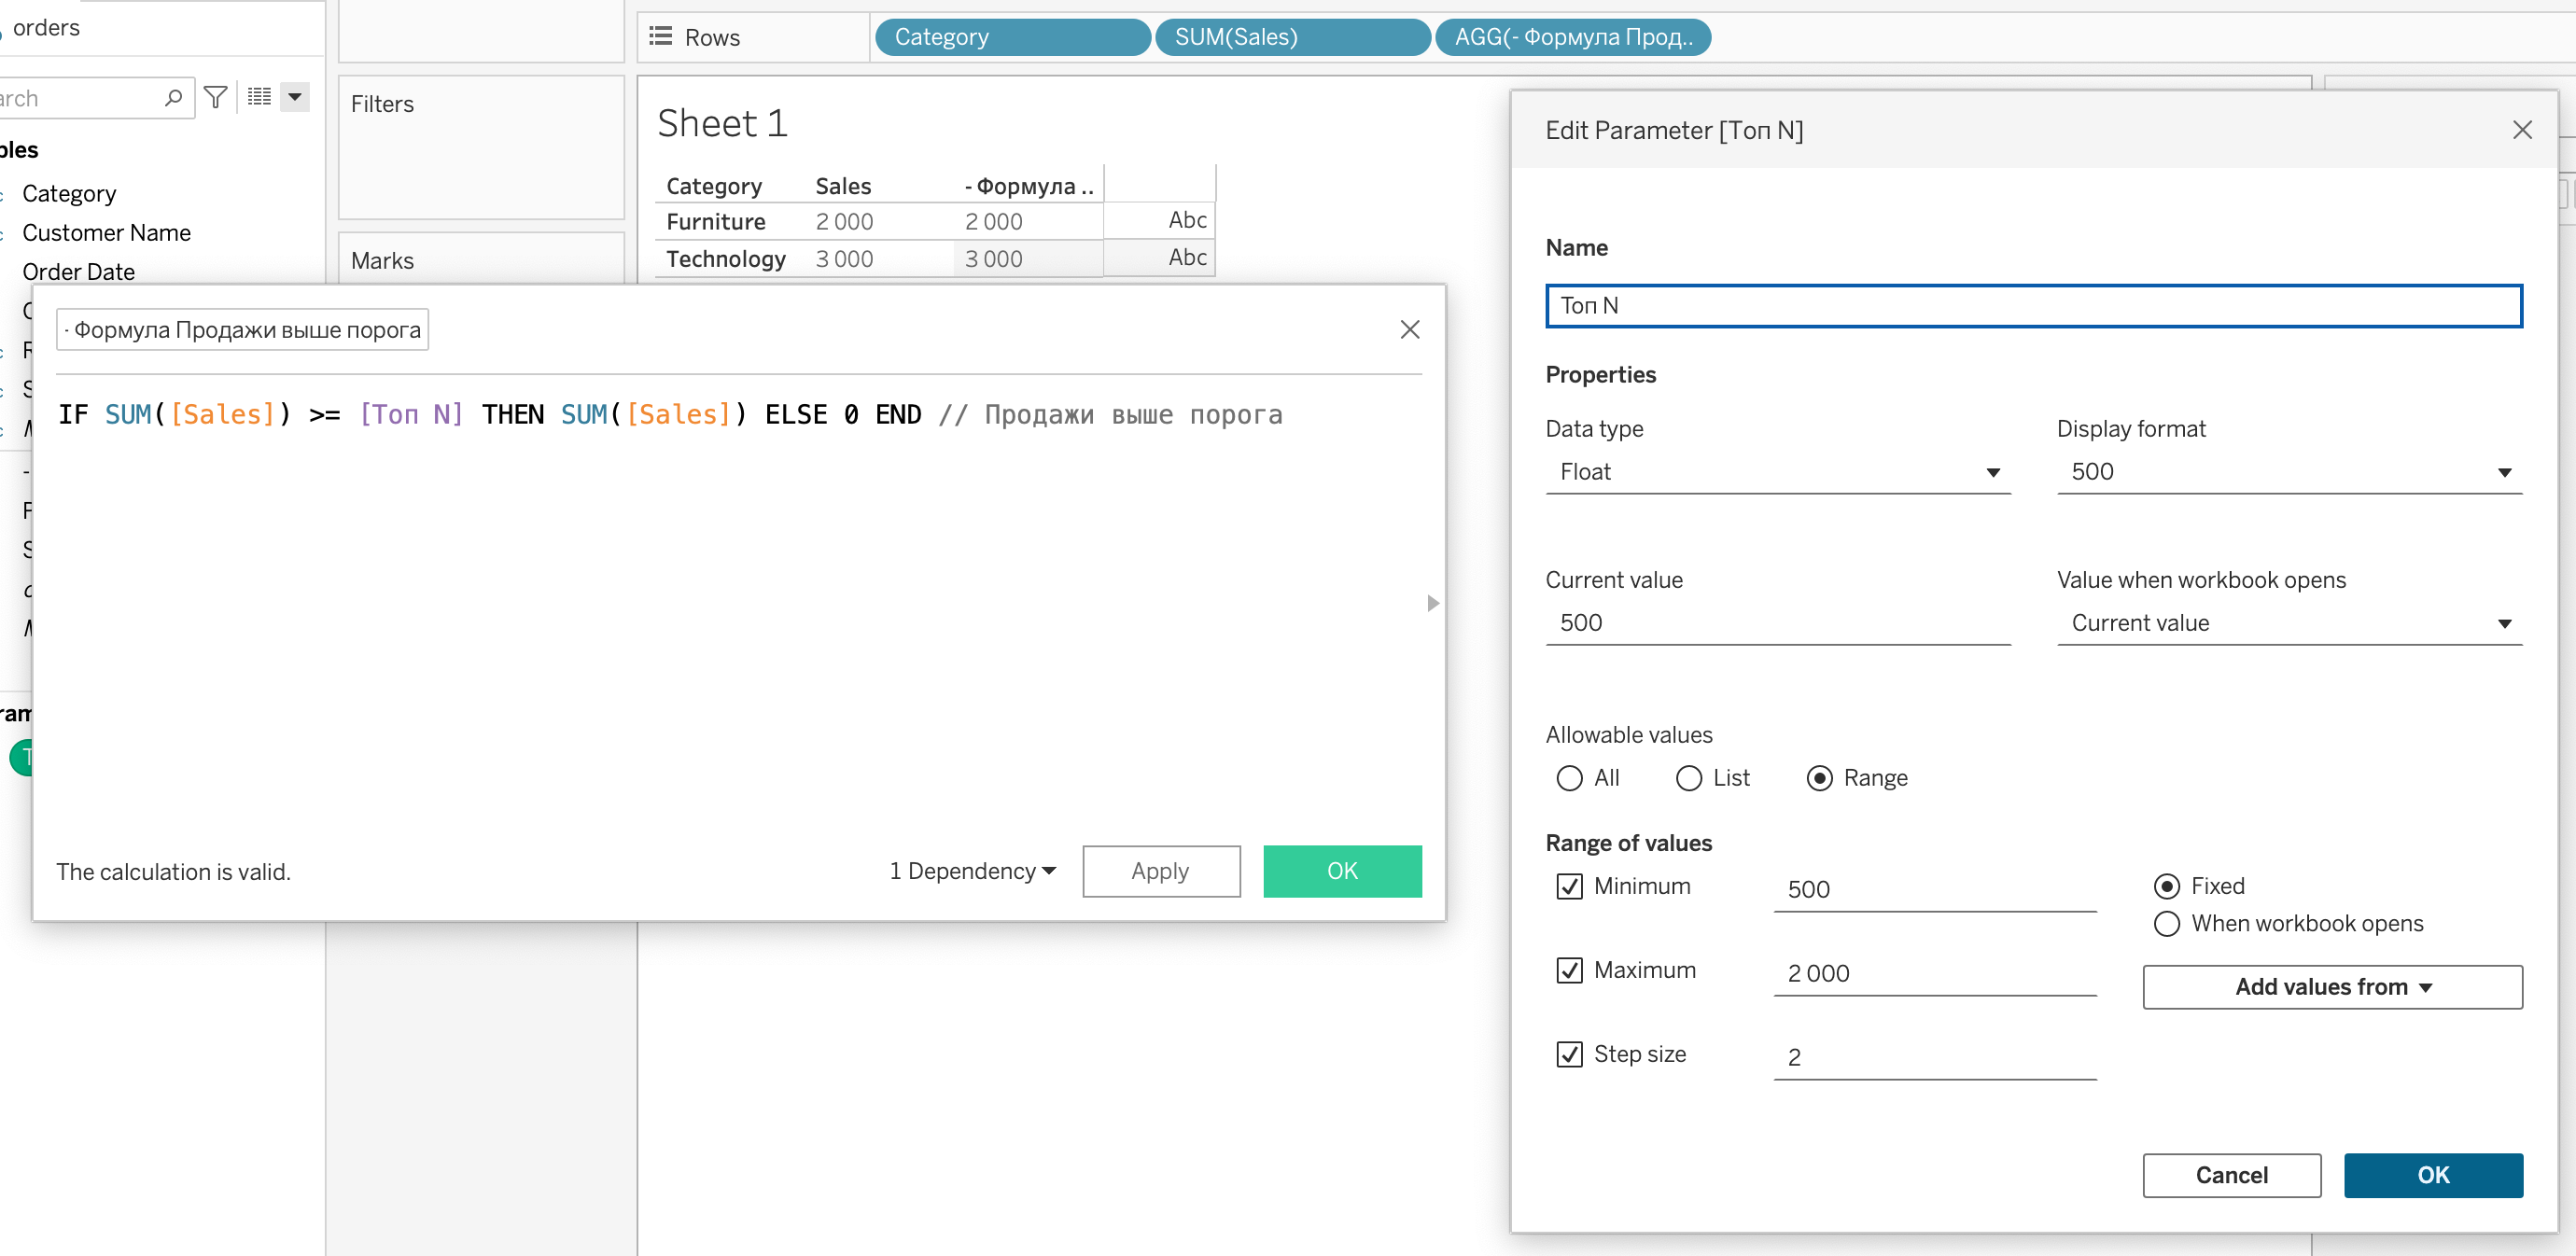

**Что получаем**: Топ-2 категории (Technology и Furniture). Если выбрать 1, останется только Technology.
* **Параметр для выбора метрики**  
  * **Условие**: Хотим, чтобы пользователь выбирал, что смотреть — продажи или прибыль.  
  * **Что делаем**:  
    * Создаём параметр "Выбранная метрика" (тип: String, список: "Sales", "Profit", по умолчанию: "Sales").  
    * Показываем параметр.  
    * Создаём формулу:   CASE [Выбранная метрика]
      WHEN "Sales" THEN SUM([Sales])
      WHEN "Profit" THEN SUM([Profit])
      END // Выбранная метрика
  * **Как работает**: Пользователь выбирает "Sales" или "Profit", и формула показывает соответствующую сумму.  
  * **Пример**: Пользователь выбрал "Profit".  
**Итоговая таблица** (визуализация с [Region]):  
| Region | SUM([Profit]) | CASE [Выбранная метрика] ... END |
|:-:|:-:|:-:|
| West | 500 | 500 |
| East | 350 | 350 |

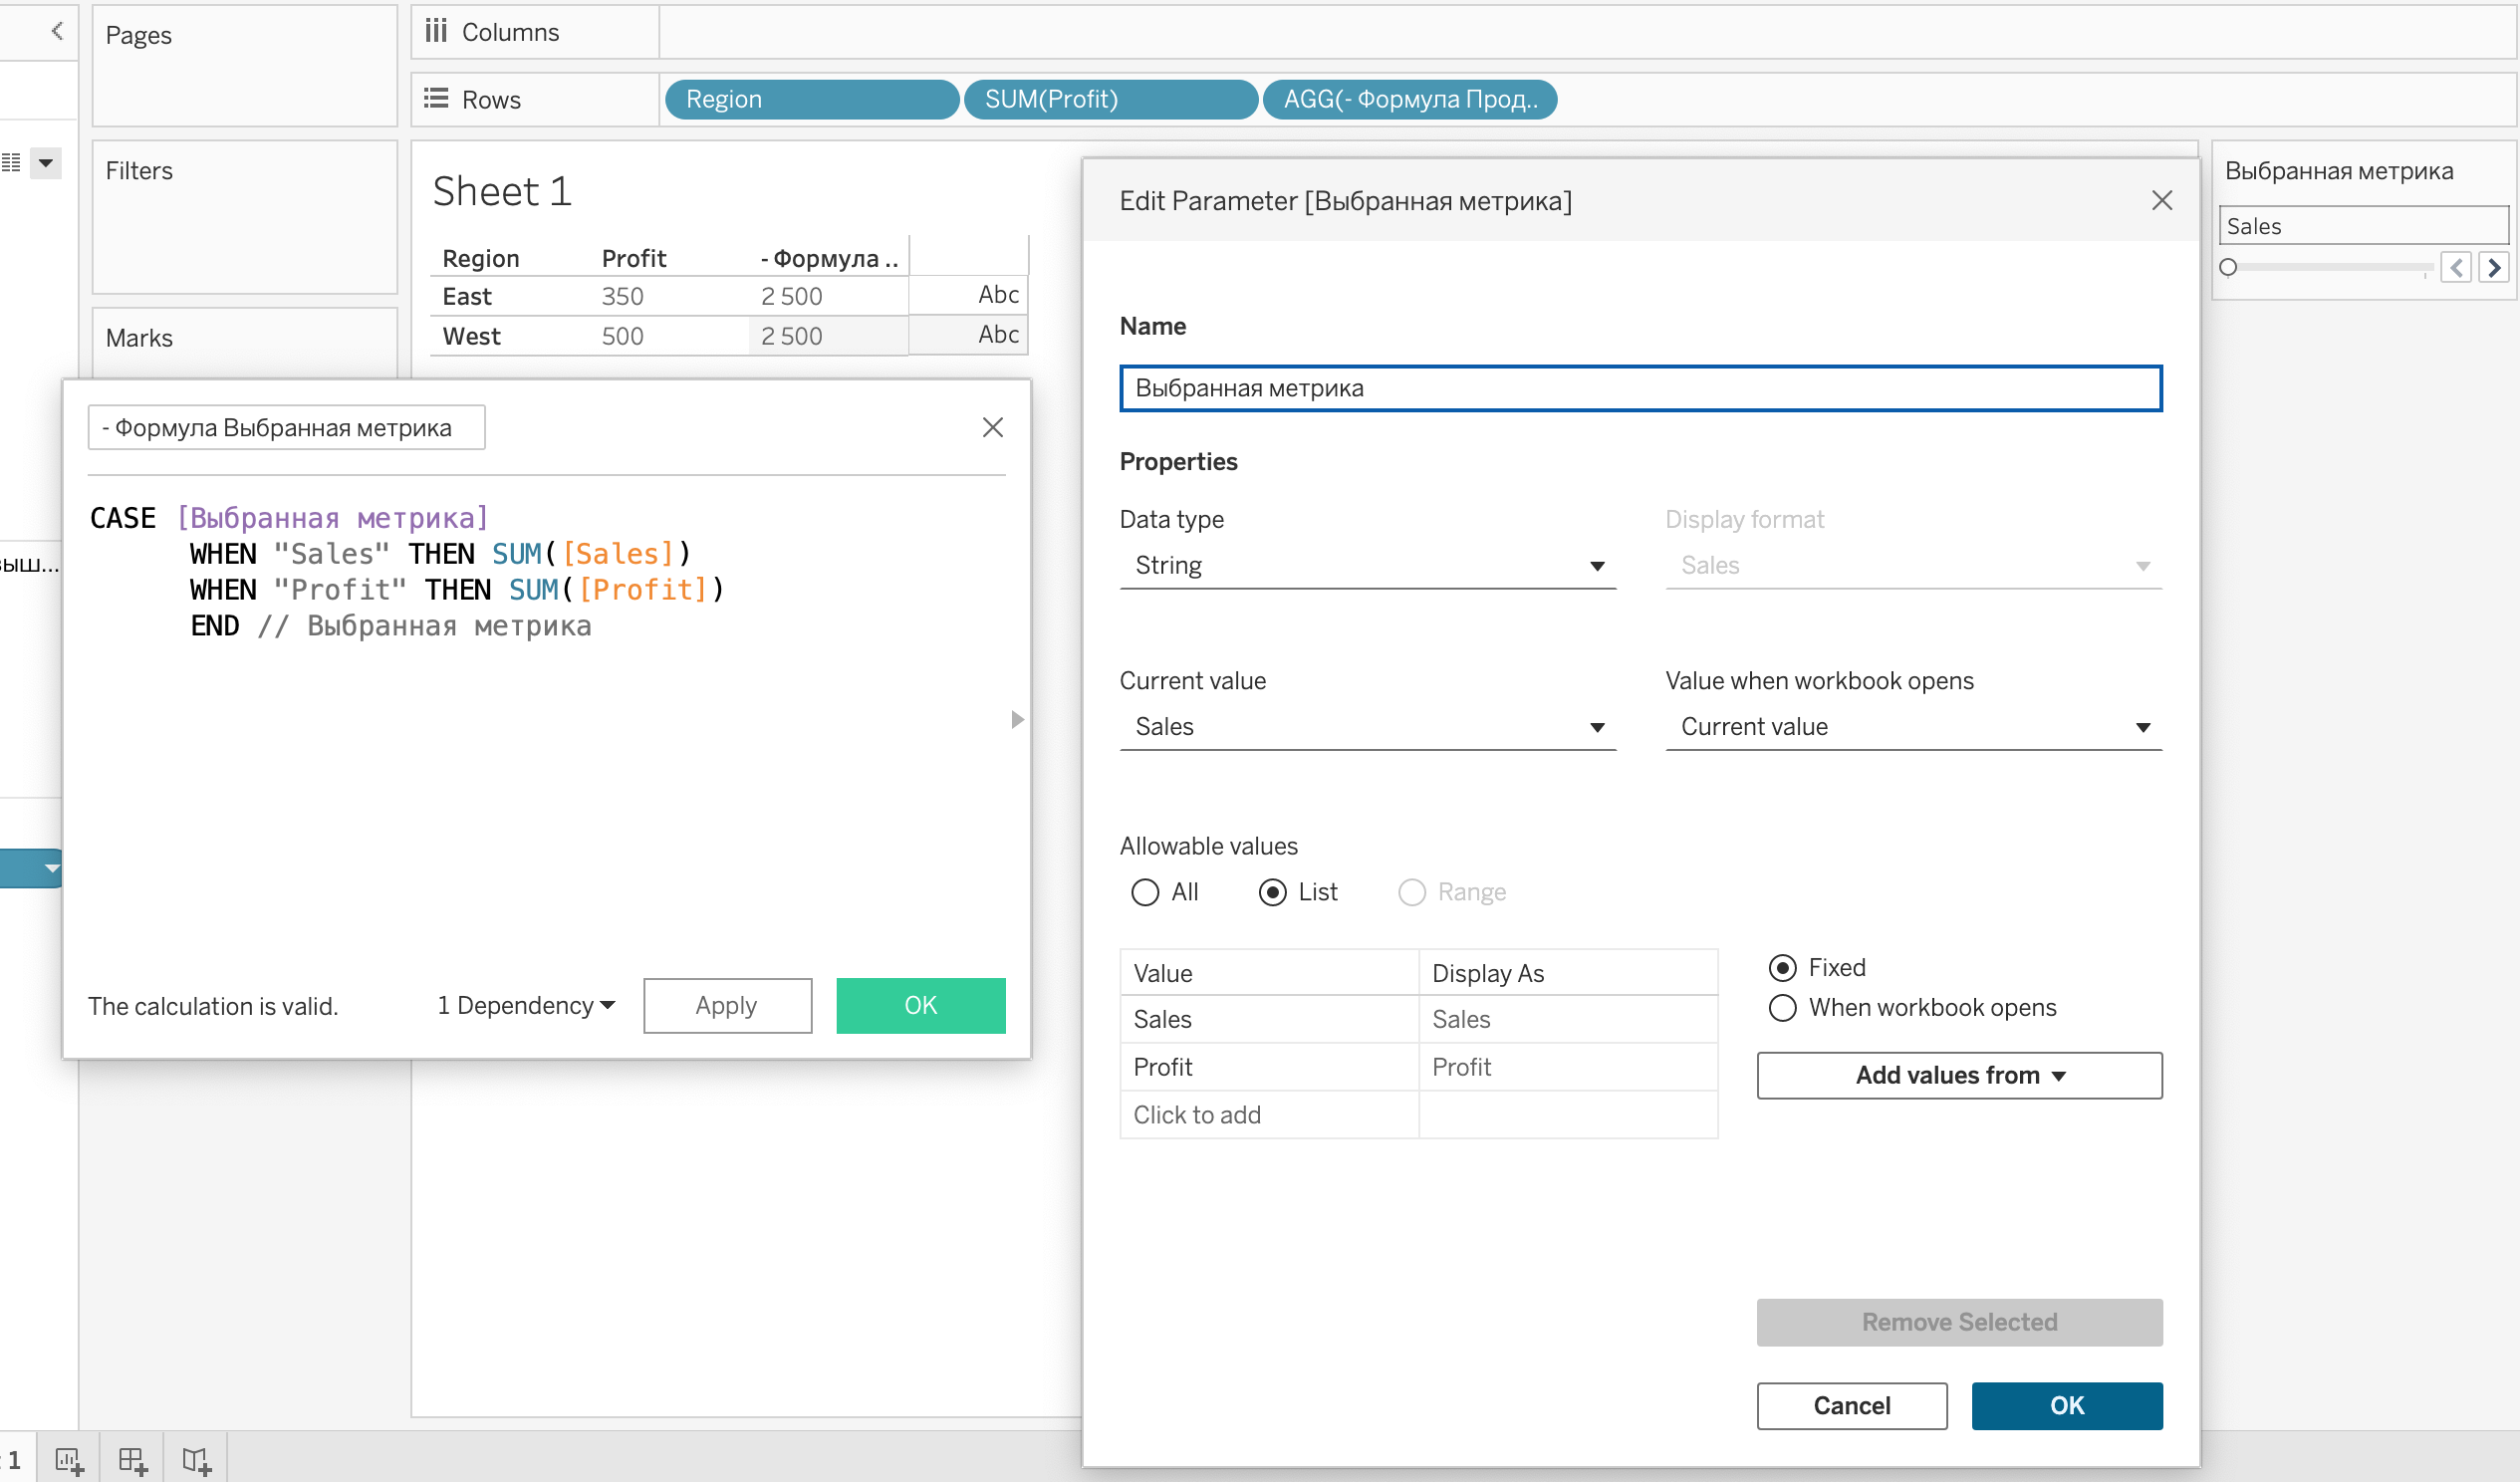

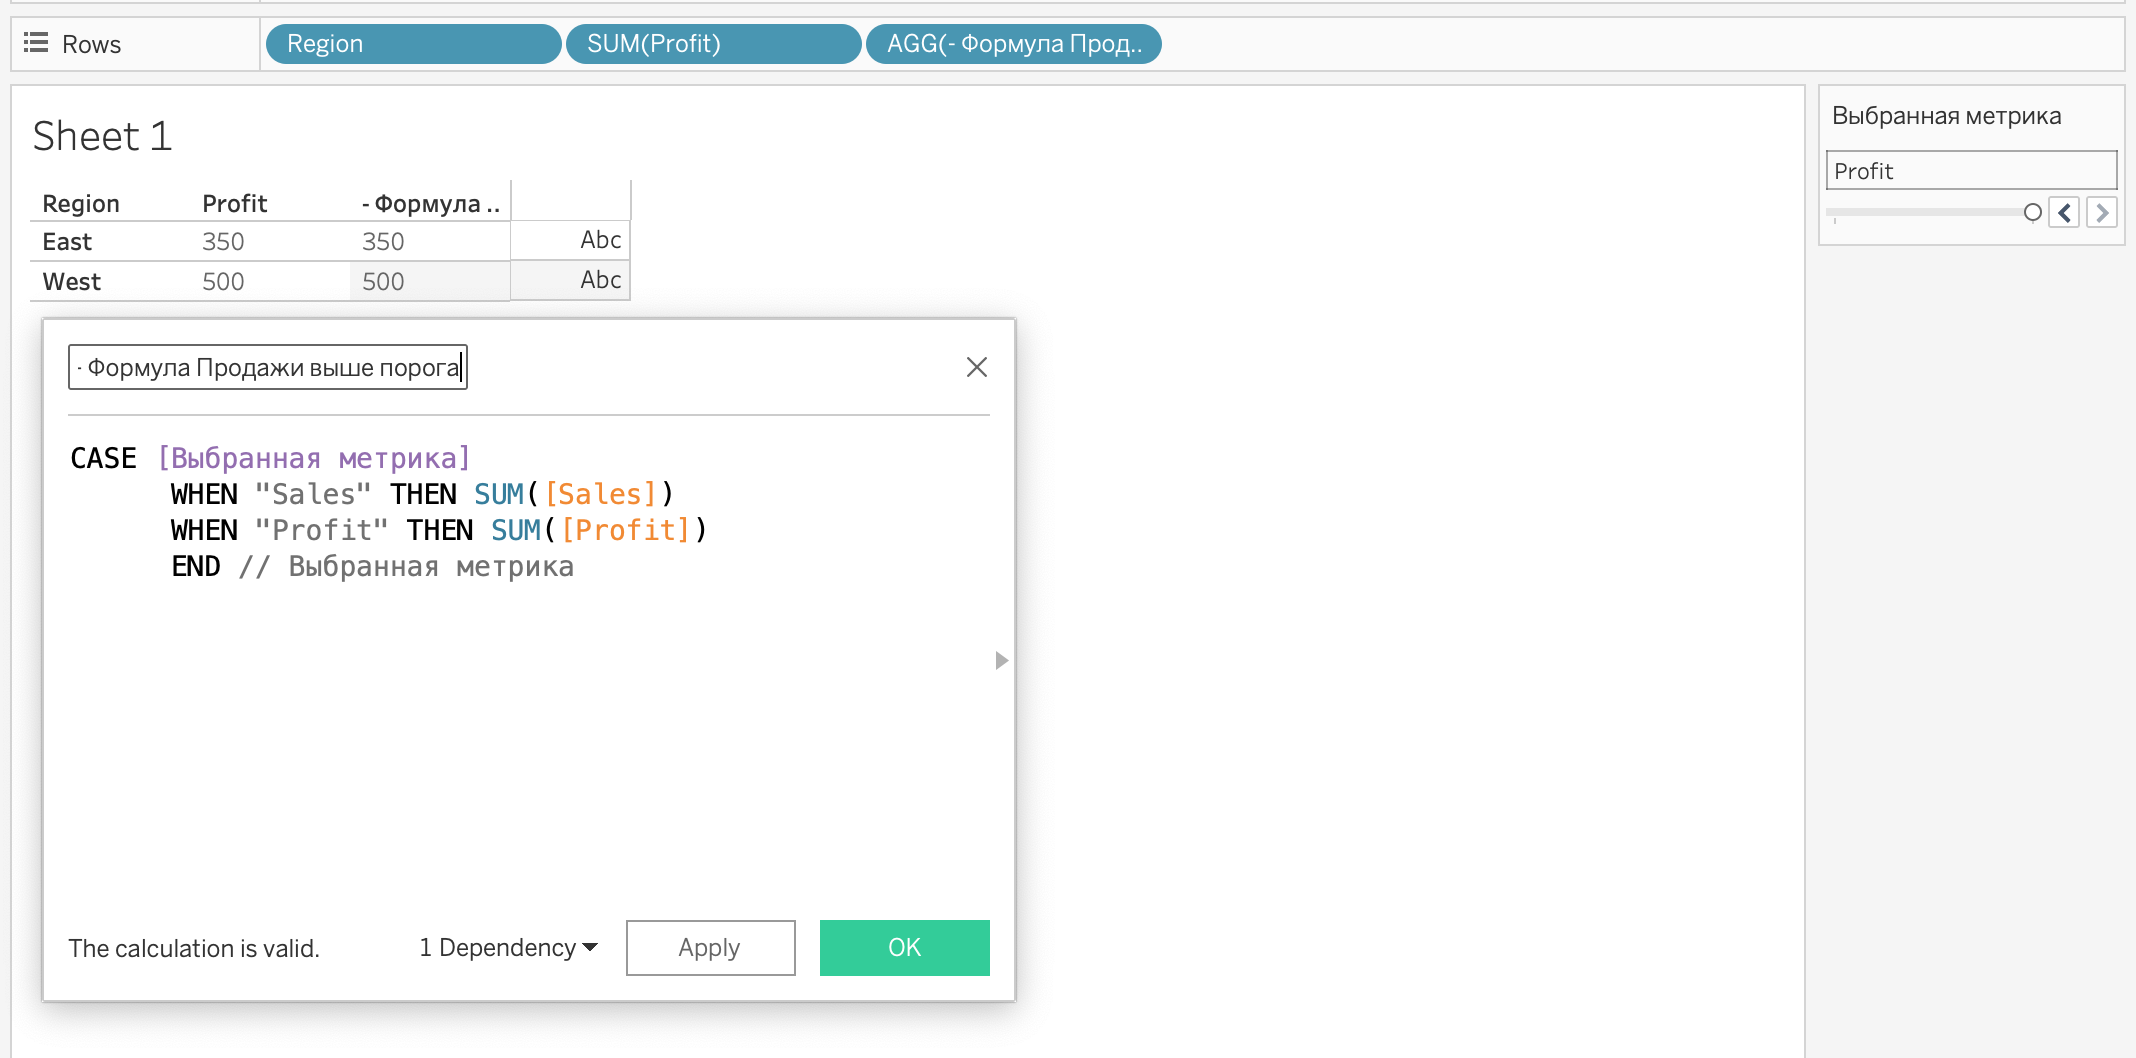

**Что получаем**: Прибыль по регионам. Если выбрать "Sales", покажет продажи (2500 для каждого региона).
* **Параметр для даты**  
  * **Условие**: Хотим, чтобы пользователь выбирал дату, и видеть продажи только до этой даты.  
  * **Что делаем**:  
    * Создаём параметр "Выбранная дата" (тип: Date, диапазон: 2025-01-01 до 2025-12-31, по умолчанию: 2025-02-01).  
    * Показываем параметр.  
    * Создаём формулу:   IF [Order Date] <= [Выбранная дата] THEN [Sales] ELSE 0 END // Продажи до даты
  * **Как работает**: Пользователь выбирает дату, и формула показывает продажи для заказов до этой даты включительно.  
  * **Пример**: Пользователь выбрал 2025-02-01.  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | IF [Order Date] <= [Выбранная дата] THEN [Sales] ELSE 0 END |
|:-:|:-:|:-:|
| Technology | 3000 | 3000 |
| Furniture | 2000 | 1500 |

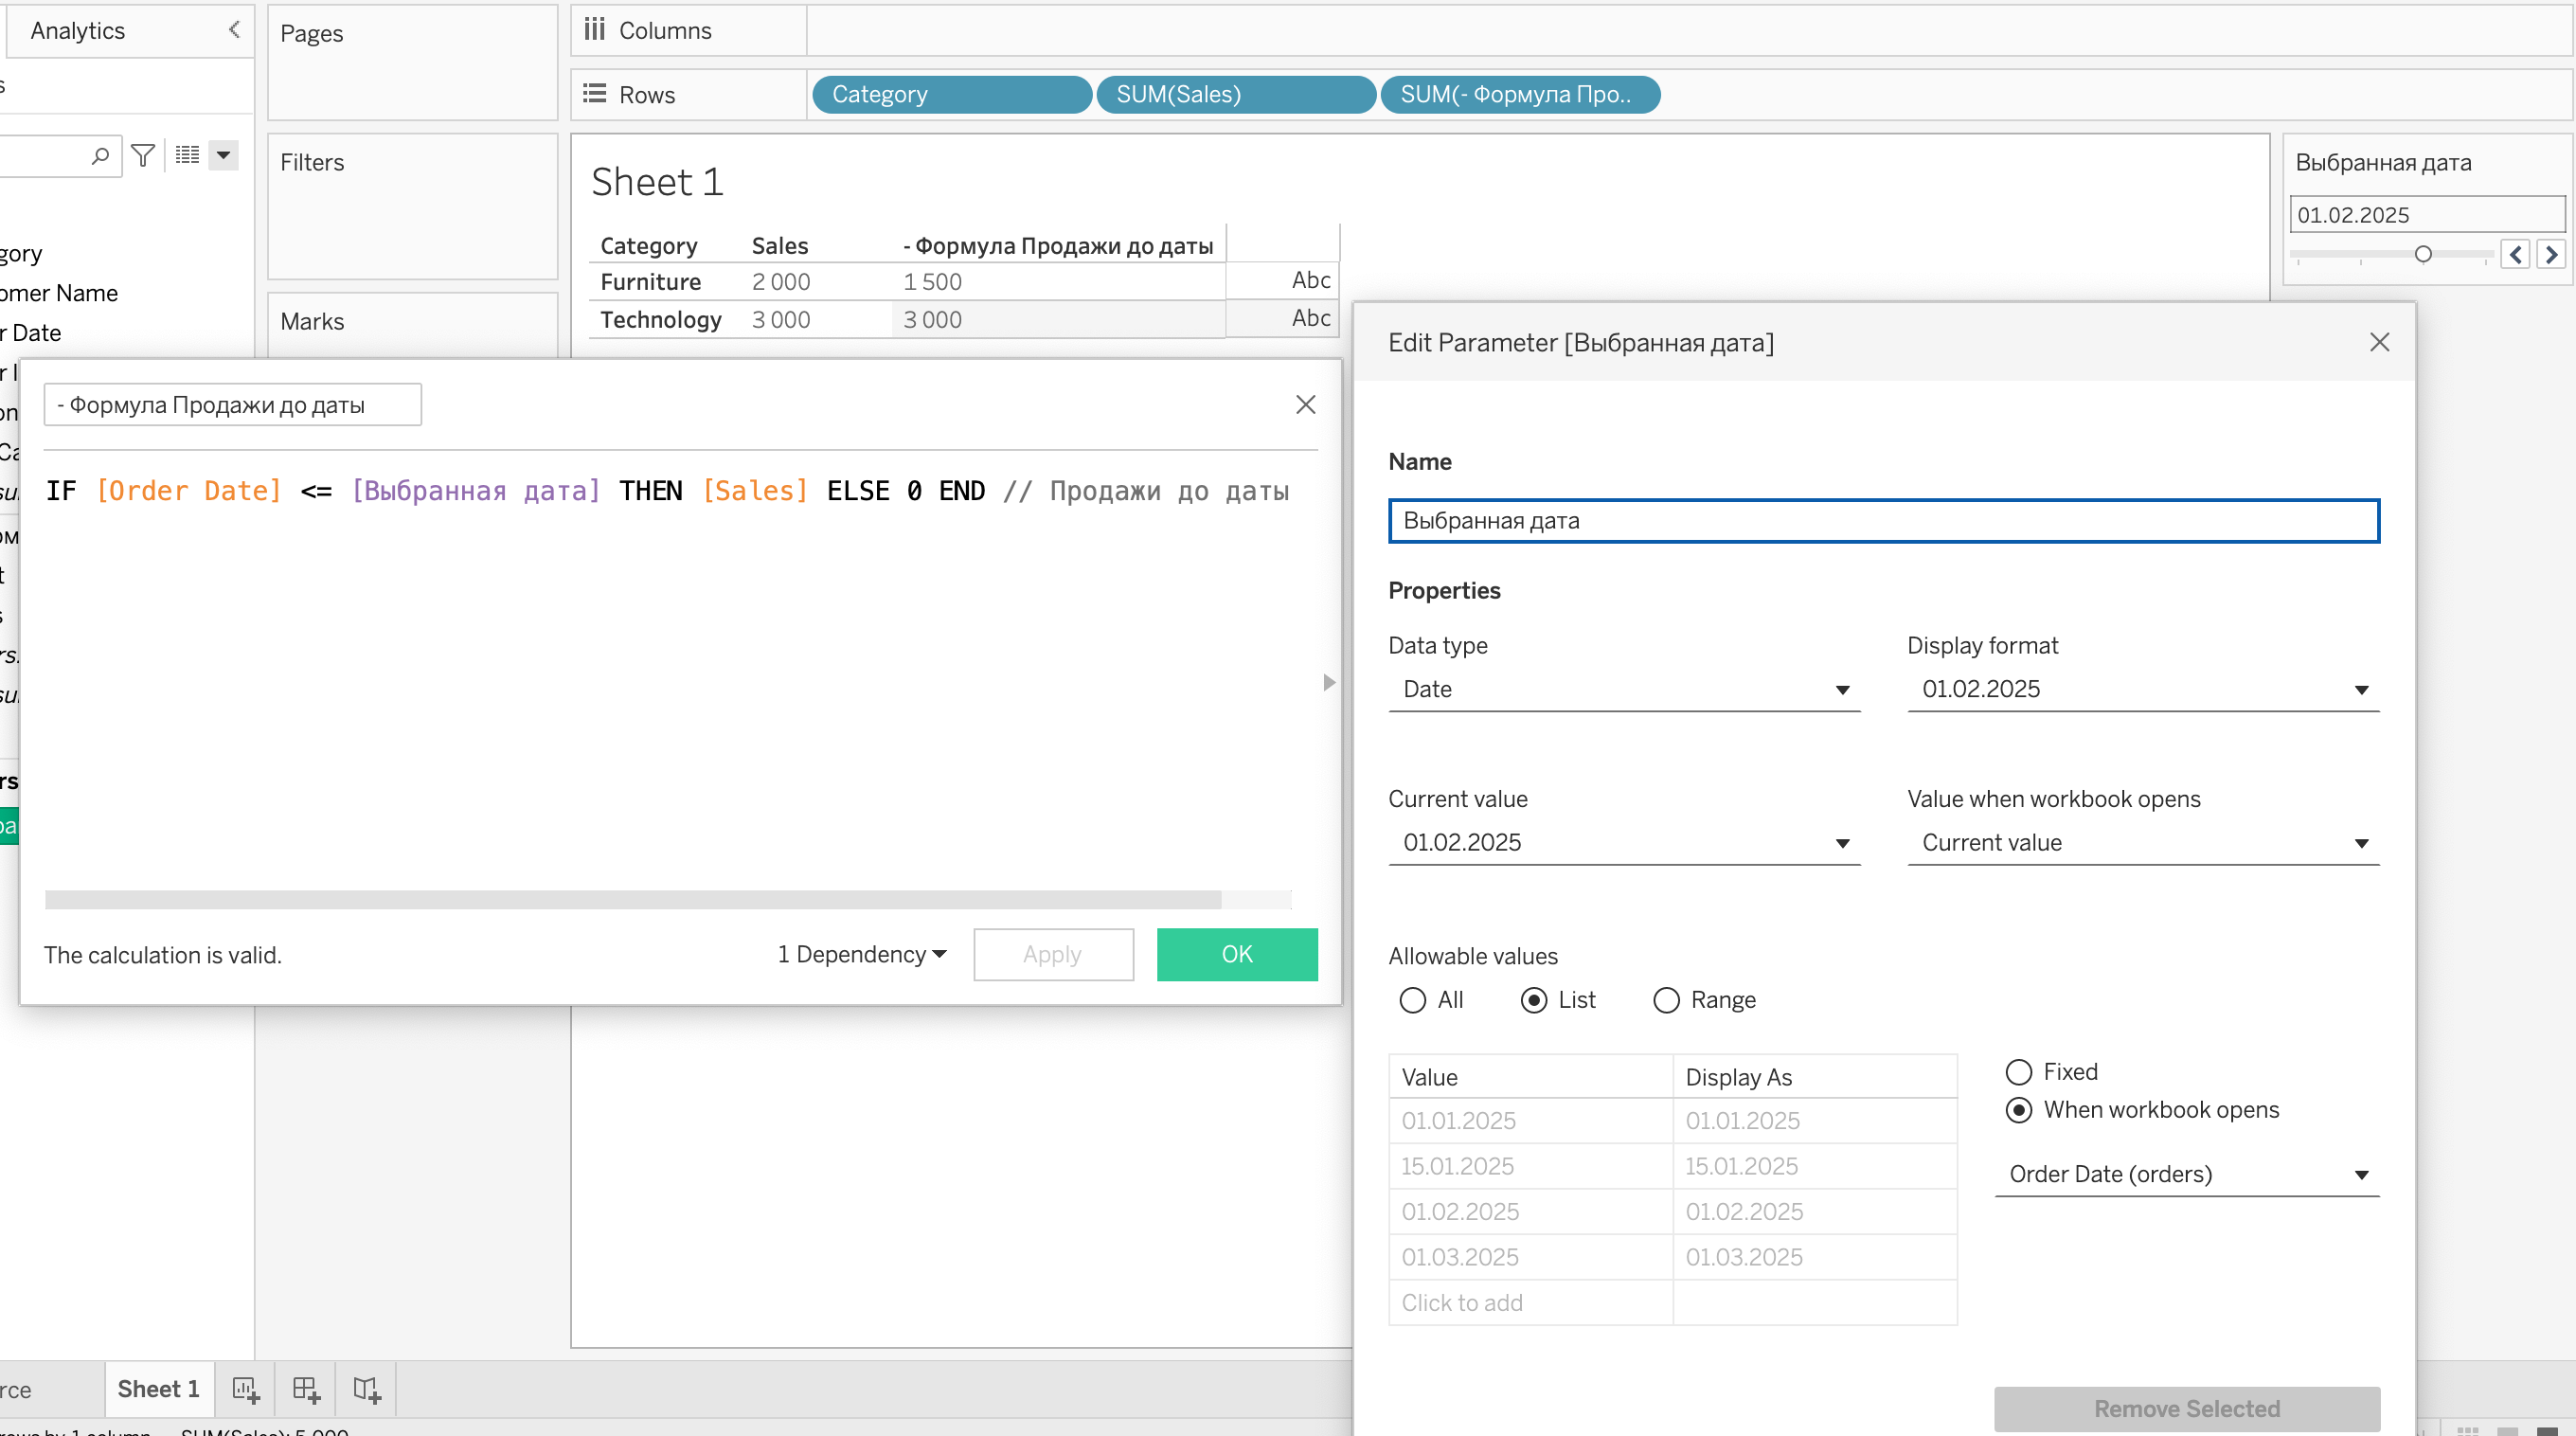

**Что получаем**: Technology (1000 + 2000 = 3000), Furniture (1500), так как заказы до 2025-02-01.
* **Параметр для скидки в формуле**  
  * **Условие**: Хотим, чтобы пользователь вводил процент скидки, и видеть, как он влияет на прибыль.  
  * **Что делаем**:  
    * Создаём параметр "Процент скидки" (тип: Number, диапазон: 0–0.5, шаг: 0.05, по умолчанию: 0.1).  
    * Показываем параметр.  
    * Создаём формулу:   SUM([Profit]) - (SUM([Sales]) * [Процент скидки]) // Прибыль после скидки
  * **Как работает**: Пользователь вводит скидку (например, 10%), и формула вычитает эту сумму из прибыли.  
  * **Пример**: Пользователь выбрал 0.1 (10%).  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Profit]) | SUM([Profit]) - (SUM([Sales]) * [Процент скидки]) |
|:-:|:-:|:-:|
| Technology | 600 | 300 (600 - 3000 * 0.1) |
| Furniture | 250 | 50 (250 - 2000 * 0.1) |
**Что получаем**: Прибыль с учётом 10% скидки. Если выбрать 20%, результаты будут 0 и -150.

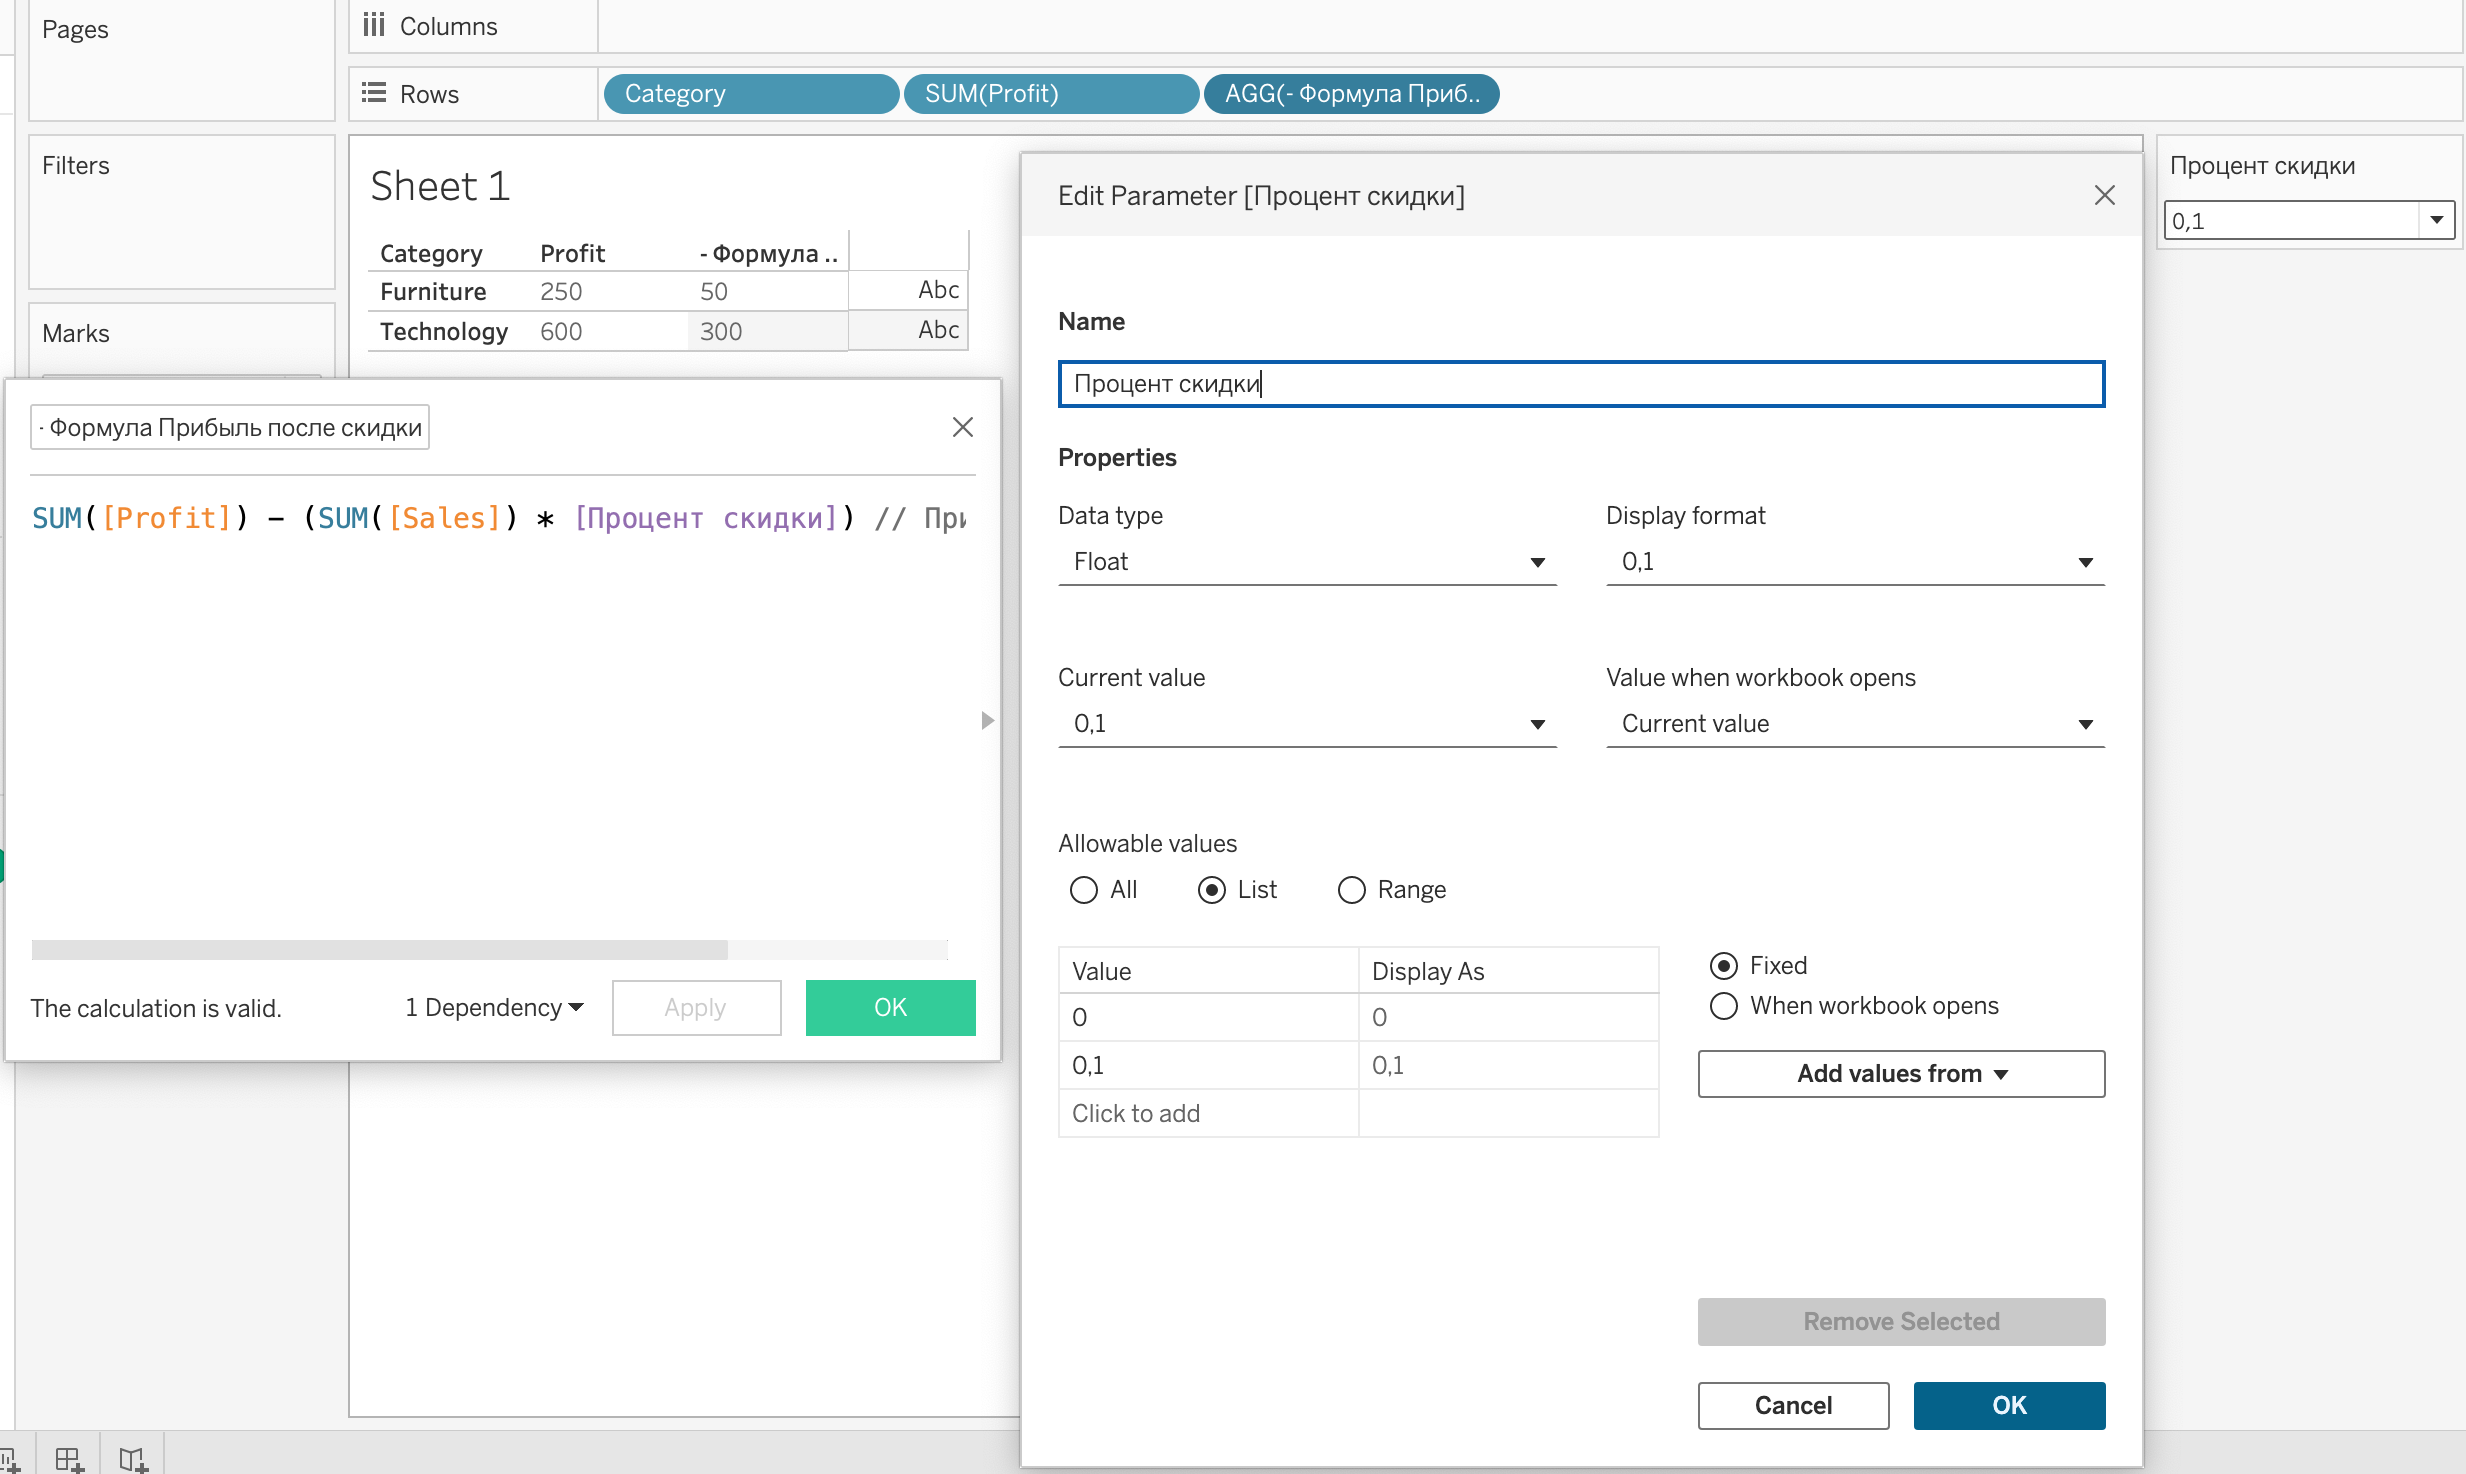

## Рекомендации для новичков
* **Думай, что нужно пользователю**: Решай, что пользователь должен выбирать — регион, число, дату или метрику.  
* **Тестируй в таблице**: Построй таблицу с [Category] или [Region], добавь формулу с параметром и поменяй значения, чтобы проверить, как работает.  
* **Делай списки понятными**: Для параметра типа String (например, регионы) задавай значения, которые пользователь поймёт (не "W", а "West").  
* **Ограничивай диапазоны**: Для чисел или дат задавай разумный диапазон (например, скидка 0–50%), чтобы пользователь не сломал дашборд.  
* **Обрабатывай NULL**: Используй ZN(SUM([Sales])) в формулах, чтобы не было пропусков (см. Модуль 2).  
* **Проверяй фильтры**: Убедись, что фильтры в рабочем листе или Data Source не мешают параметру. Data Source фильтры (например, [Year] = 2025) ограничивают данные.  
* **Пиши комментарии**: Добавляй // Продажи выбранного региона или /* Прибыль со скидкой */ в формулы, чтобы не запутаться.  
* **Не усложняй**: Если можно обойтись фильтром или простым SUM([Sales]), не лепи параметр (см. Модуль 4).

## Почему это важно?
Параметры — это как пульт управления для дашборда. Они дают пользователю возможность самому выбирать, что анализировать — регион, метрику, дату или порог — без твоей помощи. Это делает отчёты интерактивными и удобными, а ты можешь строить гибкие визуализации, которые отвечают на кучу вопросов сразу. Освоишь параметры — твои дашборды станут как настоящие приложения, где каждый может покрутить настройки и получить ответ.

Если всё ок, напиши, и я могу взяться за другую тему или доработать эту (например, добавить примеры с параметрами для LOD или табличных вычислений). Что скажешь, друг? ![](1f604_2.svg) Есть правки или го дальше?